<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_Tareas/blob/main/Clasificacion%20de%20vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

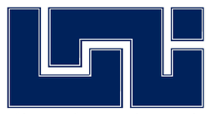

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks


[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiante:** Marvin José López Osorio


# **Tarea Modelos Supervisados**
## **Modelo de Clasificación: Tipos de vino**
Los set de datos procesados corresponden a datos de variantes de vino blanco y tinto. Se utilizó como fuente el [dataset en Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) que referencia al [repositorio de la University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/wine+quality). Para dar un giro al análisis realizado, este Colab explora la posibilidad de clasificar un vino en tinto o blanco, en función de sus características fisicoquímicas. 

###**Carga de librerias necesarias**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###**Obtención de los datos**
Los datos originales están contenidos en 2 archivos diferentes. Primeramente se agregó a cada set de datos una etiqueta (que servirá de variable objetivo) y luego se combinaron ambos set de datos.

In [53]:
#Referencias al repositorio de origen
repositorio = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
red_wine_file = 'winequality-red.csv'
white_wine_file = 'winequality-white.csv'

#Leer datos
red_wine = pd.read_csv(repositorio + red_wine_file, sep=';')
white_wine = pd.read_csv(repositorio + white_wine_file, sep=';')

#Agregar etiquetas y combinar los dataset
red_wine['tipo_vino'] = 0
white_wine['tipo_vino'] = 1
vinos = red_wine.append(white_wine)
vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo_vino
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


El dataset original continene las siguientes variables:
*   fixed acidity: acidez fija
*   volatile acidity: acidez volatil
*   citric acid: acido cítrico
*   residual sugar: azucar residual
*   chlorides: cloruros
*   free sulfur dioxide: dioxido de azufre libre
*   total sulfur dioxide: dioxido de azufre total
*   density: densidad
*   pH
*   sulphates: sulfatos
*   alcohol

Variable objetivo inicial en dataset (basado en datos sensoriales):
*   quality (score between 0 and 10): calidad (puntaje entre 0 y 10)

Adicional, se agregó la variable **tipo_vino** a manera de variable objetivo para este experimento en particular.

Dado que se pretende clasificar el tipo de vino a partir de características fisicoquímicas, la variable objetivo inicial no tiene valor para el análisis, por lo que se puede remover.

Se cambian los nombres de las variables para mejor entendimiento.

In [56]:
#Se quita la variable quality
vinos = vinos.drop(columns=['quality'])

#Se crea lista de etiquetas y se asigna a dataset
etiquetas_de_columna = ['acidez_fija','acidez_volatil','acido_citrico','azucar_residual','cloruros','SO2_libre','SO2_total','densidad','pH','sulfatos','alcohol','tipo_vino']
vinos.columns = etiquetas_de_columna

#Obtener informacion general del dataset
vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   acidez_fija      6497 non-null   float64
 1   acidez_volatil   6497 non-null   float64
 2   acido_citrico    6497 non-null   float64
 3   azucar_residual  6497 non-null   float64
 4   cloruros         6497 non-null   float64
 5   SO2_libre        6497 non-null   float64
 6   SO2_total        6497 non-null   float64
 7   densidad         6497 non-null   float64
 8   pH               6497 non-null   float64
 9   sulfatos         6497 non-null   float64
 10  alcohol          6497 non-null   float64
 11  tipo_vino        6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 819.9 KB


###**Análisis exploratorio**
De la informacion anterior se deduce que hay 6497 observaciones, todas de tipo numérico, y no se tienen valores nulos. Se quiere ver la distribución de las clases objetivo: vino tinto (0) y blanco (1).

In [66]:
tipos = {0:'Vino tinto', 1:'Vino blanco'}
distrib_tipos = vinos.tipo_vino.map(tipos).describe()
distrib_tipos

count            6497
unique              2
top       Vino blanco
freq             4898
Name: tipo_vino, dtype: object

Se observa que hay más registros de Vino blanco, lo que indica que las clases no están uniformemente distribuidas.

Los descriptivos del resto del set de datos son:

In [67]:
vinos.drop(columns=['tipo_vino']).describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,SO2_libre,SO2_total,densidad,pH,sulfatos,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


Se verificara la distribución de cada variable mediante histogramas. En algunos casos se transformo logarítmicamente la serie para mejor visualización.

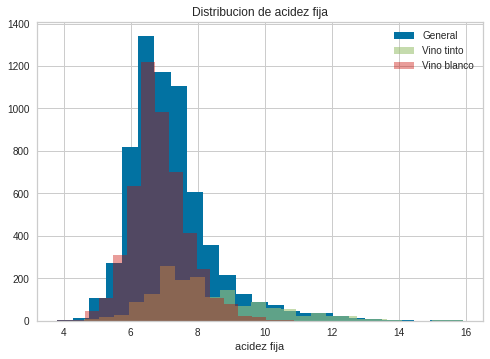

In [90]:
variable = 'acidez_fija'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

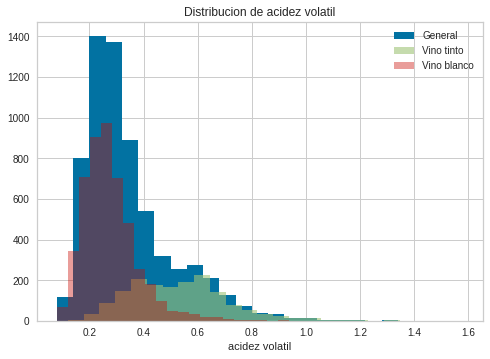

In [91]:
variable = 'acidez_volatil'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

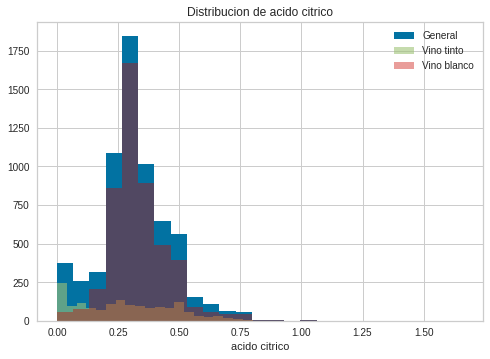

In [92]:
variable = 'acido_citrico'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

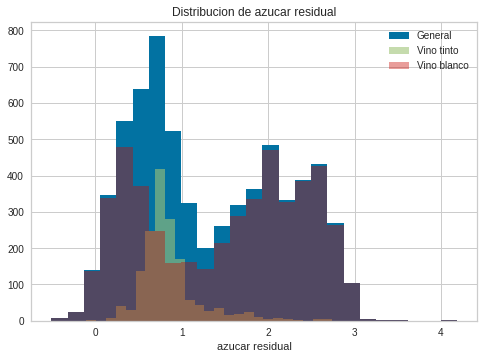

In [102]:
variable = 'azucar_residual'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].apply(np.log).hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].apply(np.log).hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].apply(np.log).hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

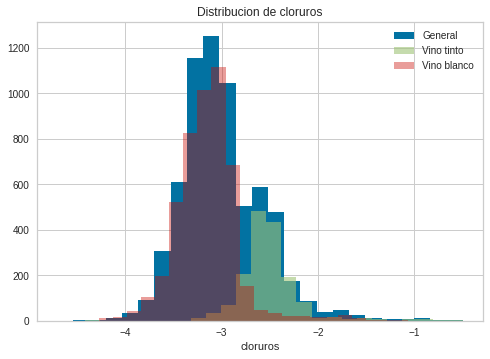

In [101]:
variable = 'cloruros'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].apply(np.log).hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].apply(np.log).hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].apply(np.log).hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

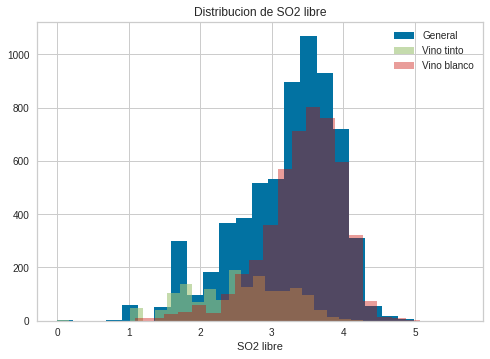

In [103]:
variable = 'SO2_libre'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].apply(np.log).hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].apply(np.log).hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].apply(np.log).hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

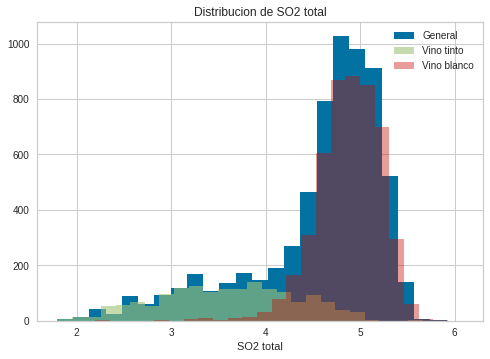

In [104]:
variable = 'SO2_total'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].apply(np.log).hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].apply(np.log).hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].apply(np.log).hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

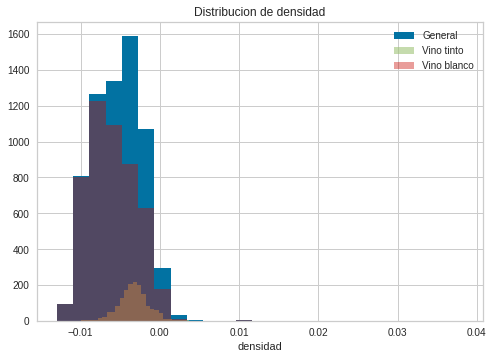

In [107]:
variable = 'densidad'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].apply(np.log).hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].apply(np.log).hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].apply(np.log).hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

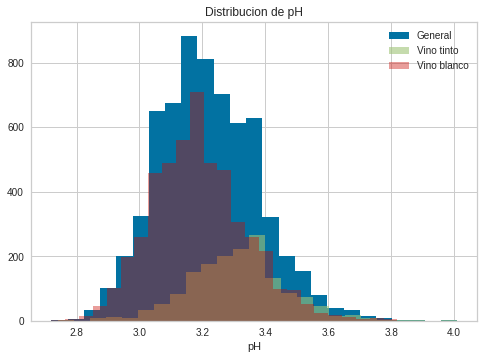

In [109]:
variable = 'pH'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

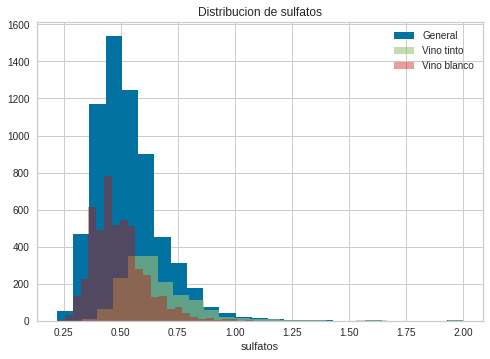

In [111]:
variable = 'sulfatos'
etiqueta = variable.replace('_',' ')
binsize = 25
vinos[variable].hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

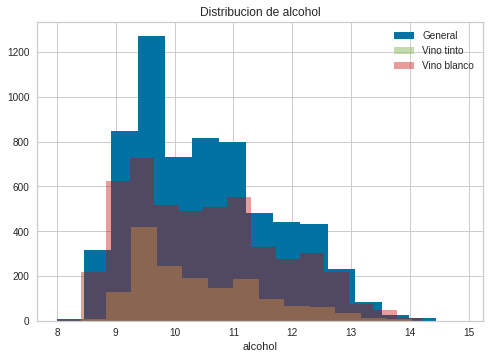

In [114]:
variable = 'alcohol'
etiqueta = variable.replace('_',' ')
binsize = 15
vinos[variable].hist(bins=binsize)
vinos[vinos.tipo_vino == 0][variable].hist(bins=binsize,alpha=0.6)
vinos[vinos.tipo_vino == 1][variable].hist(bins=binsize,alpha=0.4)
plt.legend(['General','Vino tinto', 'Vino blanco'])
plt.xlabel(etiqueta)
plt.title('Distribucion de '+ etiqueta)
plt.show()

En algunos de los gráficos anteriores se observa bimodalidad de los datos, lo que sugiere el punto de distinción entre los dos tipos de vino, aunque hay variables que en ambos tipos tienen la misma distribución, por ejemplo, grado de alcohol.

Se realiza también una matriz de correlación.

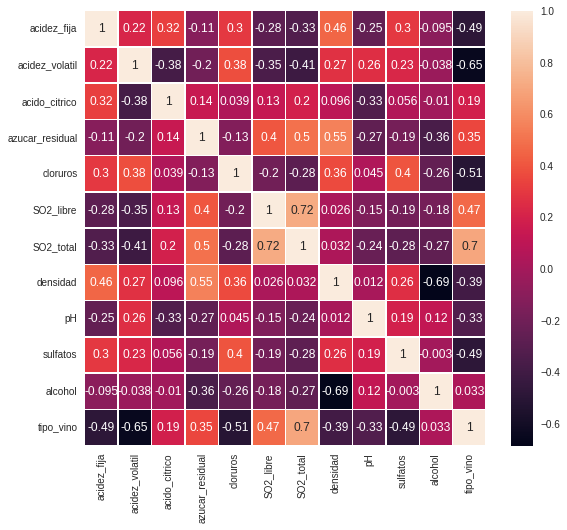

In [115]:
corr_matrix = vinos.corr(method='pearson')
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)
plt.show()